In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import lightgbm as lgb

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

target_col = ['사망자수','중상자수','경상자수','부상자수']

use_col = df_test.columns.tolist()
use_col.extend(target_col)

df_train = df_train[use_col]

# ID

In [3]:
df_train.drop(['ID'], axis = 1,inplace = True)
df_test.drop(['ID'], axis = 1,inplace = True)

# 사고일시, 요일
    - 요일 사용 -> '년-월-일' 중 '일' 데이터 사용 X
    - 월, 시간 사용

In [4]:
df_train['date'] = df_train['사고일시'].str.split(expand=True)[0]
df_train['time'] = df_train['사고일시'].str.split(expand=True)[1]

df_test['date'] = df_test['사고일시'].str.split(expand=True)[0]
df_test['time'] = df_test['사고일시'].str.split(expand=True)[1]

df_train.drop(['사고일시'], axis = 1,inplace = True)
df_test.drop(['사고일시'], axis = 1,inplace = True)

In [5]:
df_train['month'] = df_train['date'].str.split('-', expand=True)[1]
df_test['month'] = df_test['date'].str.split('-', expand=True)[1]

In [6]:
df_train.drop(['date'], axis = 1,inplace = True)
df_test.drop(['date'], axis = 1,inplace = True)

In [7]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['요일'])], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['요일'])], axis=1)

df_train.drop(['요일'], axis = 1,inplace = True)
df_test.drop(['요일'], axis = 1,inplace = True)

## 학습

In [8]:
df_train['target'] = df_train['사망자수']*10 + df_train['중상자수']*5 + df_train['경상자수']*3 + df_train['부상자수']
df_train.drop(columns = ['사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

In [9]:
use_col = ['time','month','월요일','화요일','수요일','목요일','금요일','토요일','일요일']

In [10]:
X = df_train[use_col]
y = df_train['target']

In [11]:
X = X.astype('float')

In [12]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

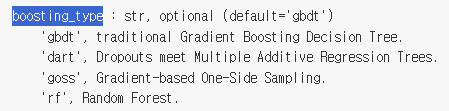

In [13]:
model = lgb.LGBMRegressor(learning_rate = 0.055, random_state=42, boosting_type='gbdt')

In [14]:
model.fit(x_train, y_train) 

LGBMRegressor(learning_rate=0.055, random_state=42)

In [15]:
pred = model.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [18]:
rmse(y_test, pred)

3.159920526750467

In [19]:
model.score(x_train, y_train)

0.028252581867740045

In [297]:
model.score(x_test, y_test)

0.0005247524526552638